# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 1

Στοιχεία μέλους 1: Θεόδωρος Αράπης (el18028)

Στοιχεία μέλους 2: Εμμανουήλ Βλάσσης (el18086)

# Μέρος 1

In [1]:
import numpy as np
from queue import Queue, LifoQueue, PriorityQueue
import random 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import math


class Maze:
	def __init__(self, N, S, F):

		"""
		N: integer that indicates the size of the NxN grid of the maze
		S: pair of integers that indicates the coordinates of the starting point (S)
		F: pair of integers that indicates the coordinates of the finish point (F)
		You can add any other parameters you want to customize maze creation (e.g. variables that
		control the creation of additional paths)
		"""

		assert N > 2

		## Make sure start and end are within the grid

		assert S[0] < N-1
		assert S[1] < N-1
		assert F[0] < N-1
		assert F[1] < N-1

		assert S[0] > 0
		assert S[1] > 0
		assert F[0] > 0
		assert F[1] > 0

		# Add here any additional constraints your implementation may have

		self.N = N
		self.S = S
		self.F = F
		self.grid = np.zeros((N, N), dtype=bool)
		stack = LifoQueue()
		visited = set() 

		"""Ένα set που αποθηκεύουμε τα cells που επισκεπτόμαστε. Χρησιμοποιούμε set προκειμένου να τσεκάρουμε 
		αν κάποιο cell ανήκει στο σύνολο σε O(1).
		Η υλοποίηση γίνεται με depth-first search. 
		Αντί για κλήση αναδρομικής συνάρτησης που θα μπορούσε να προκαλέσει stack overflow για πολύ μεγάλες διαστάσεις, 
		χρησιμοποιούμε stack στο οποίο αποθηκεύουμε τους κόμβους που θέλουμε να επισκεφτούμε."""
		
		# Grid initialized with obstacles (array of 0/False)
		# 1/True indicates available neighbours
		
		# "Ενεργοποιούμε" τα κελιά της αρχής και του τέλους ώστε να είναι μέρος του μονοπατιού

		r, c = S
		self.grid[r][c] = 1
		r, c = F
		self.grid[r][c] = 1

		stack.put(self.S)
		visited.add(self.S)

		while not stack.empty(): # Μέχρι να αδειάσει το stack
			x, y = stack.get() # Οι συντεταγμένες του εξεταζόμενου κελιού
			neighbour = []
		
			"""Οι τοίχοι θέλουμε να έχουν πάχος ενός κελιού, συνεπώς θα κοιτάμε τα γειτονικά κελιά (North, South, West, East) 
			που απέχουν δύο κελιά από το εξεταζόμενο κελί. Επιβεβαιώνουμε ότι ο γείτονας αυτός δεν βρίσkεται στην περίμετρο του λαβυρίνθου 
			και ότι δεν τον έχουμε επισκεφτεί και στην συνέχεια τον προσθέτουμε στην λίστα neighbour."""

			if x > 2 and (x - 2, y) not in visited:
				neighbour.append((x - 2, y)) # West
			if x < N - 3 and (x + 2, y) not in visited:
				neighbour.append((x + 2, y)) # East
			if y > 2 and (x, y - 2) not in visited:
				neighbour.append((x, y - 2)) # North
			if y < N - 3 and (x, y + 2) not in visited:
				neighbour.append((x, y + 2)) # South
			
			"""Εφόσον υπάρχει τουλάχιστον ένα γειτονικό κελί στην λίστα neighbour, επιλέγουμε τυχαία ένα και "γκρεμίζουμε" 
			τον τοίχο ανάμεσά στα δύο κελιά (το εξεταζόμενο και τον γείτονά του)"""
			
			if len(neighbour) > 0:
				stack.put((x, y))
				X, Y = random.choice(neighbour) # Οι συντεταγμένες του γείτονα
				
				if X < x:
					self.grid[x - 1][y] = 1 # West
					visited.add((x - 1, y))
				elif X > x:
					self.grid[x + 1][y] = 1 # East
				elif Y < y:
					self.grid[x][y - 1] = 1 # North
					visited.add((x, y - 1))
				else:
					self.grid[x][y + 1] = 1 # South
					visited.add((x, y + 1))
	
				self.grid[X][Y] = 1
				visited.add((X, Y))
				stack.put((X, Y))
				
				"""Τέλος, θα έχουμε δημιουργήσει ένα perfect maze (θα έχουμε δηλαδή ένα μονοπατι που θα συνδέει όλα τα κελιά μεταξύ τους).
				Προκειμένου να δημιουργήσουμε πολλαπλά μονοπάτια από την αρχή προς το τέλος πρέπει να  γκρεμίσουμε τουλάχιστον έναν τοίχο (κελί που δεν έχουμε επισκεφτεί).
				Επιλέγουμε τυχαία αυτόν τον τοίχο, με συνθήκη να μην βρίσκεται στην περίμετρο.
				Επιπλέον θέλουμε τα δεξιά και αριστερά κελιά του καθώς και τα πάνω και κάτω να είναι είτε τοίχοι και μονοπάτια αντίστοιχα, είτε μονοπάτια και τοίχοι,
				προκειμένου να μην δημιουργηθεί μονοπάτι πλάτους μεγαλύτερου του ενός κελιού ή μονοπάτι που δεν μπορούμε να έχουμε πρόσβαση."""

		for i in range(self.N//2): # Ο αριθμός που βάζουμε μέσα στο range καθορίζει τον αριθμό των τοίχων που "γκρεμίζονται"
			while (x, y) in visited or not (self.grid[x - 1][y] == self.grid[x + 1][y] and self.grid[x][y - 1] == self.grid[x][y + 1] and self.grid[x + 1][y] != self.grid[x][y - 1]):
				x = random.randrange(1, N - 1)
				y = random.randrange(1, N - 1)
			visited.add((x, y))
			self.grid[x][y] = 1


		
	def draw_map(self, path=None):
		""" Draws the maze as an image. Considers grid values of 0/False to represent obstacles and
		values of 1/True to represent empty cells, but this can be customized. Obstacles are painted
		black and empty cells are painted white. Starting point is painted green and finish point red.
		Optionally accepts as a parameter a path within the maze which is painted blue. 
		"""
		image = np.zeros((self.N, self.N, 3), dtype=int)
		image[~self.grid] = [0, 0, 0]
		image[self.grid] = [255, 255, 255]

		# Uncomment the next 2 lines of code to treat 1/True as obstacles (and 0/False as free maze cells)
		#image[self.grid] = [0, 0, 0]
		#image[~self.grid] = [255, 255, 255]

		image[self.S] = [50, 168, 64]
		image[self.F] = [168, 50, 50]
		if path:
			for n in path[1:-1]:
				image[n] = [66, 221, 245]

		plt.imshow(image)
		plt.xticks([])
		plt.yticks([])
		plt.show()

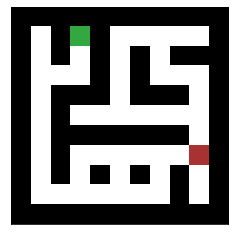

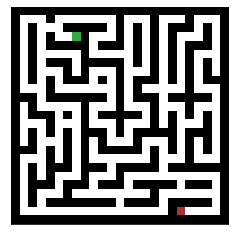

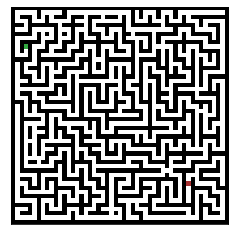

In [2]:
for N, S, F in (11, (1, 3), (7, 9)), (25, (3, 7), (23, 19)), (51, (9, 3), (41, 41)):
    map = Maze(N, S, F)
    map.draw_map()

## Σχολιασμός Μέρους 1
Υλοποιήσαμε τον αλγόριθμο randomized depth-first search. Αντί για κλήση κάποιας αναδρομικής συνάρτησης που θα μπορούσε να προκαλέσει stack overflow για πολύ μεγάλες διαστάσεις, χρησιμοποιούμε stack στο οποίο αποθηκεύουμε τα κελιά που θέλουμε να επισκεφτούμε. Σε κάθε επανάληψη του while κοιτάμε τους γείτονες του παρόντος κελιού, και αν δεν τους έχουμε επισκεφτεί τους βάζουμε με τυχαία σειρά στην κορυφή του stack. Ο αλγόριθμος σταματά μόλις βρούμε το κελί-προορισμό.
Ο λαβύρινθος που φτιάχνουμε με τον τρόπο αυτόν είναι αρχικά τέλειος, δηλαδή υπάρχει μια και μοναδική διαδρομή ανάμεσα σε κάθε ζεύγος κελιών. Για να έχουμε πολλαπλά πιθανά μονοπάτια ανάμεσα στην αρχή και τον προορισμό, ελευθερώνουμε N/2 τυχαία κελιά.

## Mέρος 2

In [3]:
# To visualization, δεν αλλάξαμε κάτι
class visualization:
	def __init__(self, S, F):
		'''
		Η μέθοδος αυτή αρχικοποιεί ένα αντικείμενο τύπου visualization.
		Είσοδος: 
		-> S: το σημείο εκκίνσης της αναζήτησης
		-> F: το σημείο τερματισμού
		'''
		self.S = S
		self.F = F
		self.images = []

	def draw_step(self, grid, frontier, expanded_nodes):
		'''
		Η συνάρτηση αυτή καλείται για να σχεδιαστεί ένα frame στο animation (πρακτικά έπειτα από την επέκταση κάθε κόμβου)
		Είσοδος: 
		-> grid: Ένα χάρτης τύπου grid
		-> frontier: Μια λίστα με τους κόμβους που ανήκουν στο μέτωπο της αναζήτησης
		-> expanded_nodes: Μια λίστα με τους κόμβους που έχουν ήδη επεκταθεί
		Επιστρέφει: None
		Η συνάρτηση αυτή πρέπει να καλεστεί τουλάχιστον μια φορά για να μπορέσει να σχεδιαστει ένα animation (πρεπεί το animation να έχει τουλάχιστον ένα frame).
		'''
		image = np.zeros((grid.N, grid.N, 3), dtype=int)
		image[~grid.grid] = [0, 0, 0]
		image[grid.grid] = [255, 255, 255]
		# Use this to treat 1/True as obstacles
		# image[grid.grid] = [0, 0, 0]
		# image[~grid.grid] = [255, 255, 255]
				
		for node in expanded_nodes:
			image[node] = [0, 0, 128]

		for node in frontier:
			image[node] = [0, 225, 0]

		image[self.S] = [50, 168, 64]
		image[self.F] = [168, 50, 50]
		self.images.append(image)

	def add_path(self, path):
		'''
		Η συνάρτηση αυτή προσθέτει στο τελευταίο frame το βέλτιστο μονοπάτι.
		Είσοδος:
		-> path: Μια λίστα η όποια περιέχει το βέλτιστο μονοπάτι (η οποία πρέπει να περιέχει και τον κόμβο αρχή και τον κόμβο στόχο)
		Έξοδος: None
		'''
		for n in path[1:-1]:
			image = np.copy(self.images[-1])
			image[n] = [66, 221, 245]
			self.images.append(image)
		for _ in range (100):
			self.images.append(image)
			
	def create_gif(self, fps = 30, repeat_delay = 2000):
		if len(self.images) == 0:
			raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
		fig = plt.figure()
		plt.axis('off')
		ims = []
		for img in self.images:
			img = plt.imshow(img)
			ims.append([img])
		ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
		plt.close(fig)
		return ani
			
	def save_gif(self, filename, fps = 30):
		'''
		Η συνάρτηση αυτή ξαναδημιουργεί και αποθηκεύει το animation σε ένα αρχείο.
		Είσοδος:
		-> Το όνομα του αρχείου με κατάληξη .gif
		Έξοδος: (None)
		'''
		ani = self.create_gif(fps)
		writer = PillowWriter(fps= fps)
		ani.save(filename, writer=writer)

	def show_gif(self, fps= 30, repeat_delay = 2000):
		'''
		Η συνάρτηση αυτή εμφανίζει inline το animation.
		Είσοδος:
		-> fps: τα frames per second
		Έξοδος: Το αντικείμενο που παίζει το animation
		Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
		'''
		ani = self.create_gif(fps, repeat_delay)
		# return HTML(ani.to_html5_video())
		return HTML(ani.to_jshtml())

	def show_last_frame(self):
		'''
		Η μέθοδος αυτή εμφανίζει inline το τελευταίο frame που έχει δημιουργήθει.
		Είσοδος:
		Έξοδος: Το αντικείμενο που εμφανίζει την εικόνα.
		Exceptions: EmptyStackOfImages αν το animation δεν έχει ούτε ένα frame, δηλαδή αν η draw_step δεν έχει καλεστεί ποτέ.
		'''
		if len(self.images) == 0:
			raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
		else:
			plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
	pass

In [4]:
class Pathfinder:
	def __init__(self, maze, c, h):
		"""
		maze : Αντικείμενο τύπου Maze (από Μέρος 1)
		c : Συνάρτηση που υπολογίζει την πραγματική απόσταση μεταξύ δύο σημείων
		h : Συνάρτηση που υπολογίζει την ευριστική μεταξύ δύο σημείων
		"""
		self.maze = maze
		self.vis = visualization(maze.S, maze.F)
		self.path = []
		self.cost = c
		self.heuristic = h
		self.expanded_nodes = [] # Το κλειστό σύνολο, χρειάζεται για το πλήθος των επεκτεταμένων κόμβων

	### Fill the path list with the coordinates of each point in the path from maze.S to maze.F
	

		"""****		ΘΕΩΡΗΤΙΚΑ	*****"""
	# g(n) = 0 & h(n) = {manhattan(n), euclidean(n)} -> Best First (Θα βρίσκει πάντα λύση εφόσον η ευριστική είναι consistent και admissible) (Οι Manhattan και η euclidean είναι consistent και admissible)
	# g(n) = 1 & h(n) = 0 -> Branch and Bound (θα βρίσκει πάντα βέλτιστη λύση στο πρόβλημά μας (όχι με τον πιο γρήγορο τρόπο όμως))
	# g(n) = 1 & h(n) = {manhattan(n), euclidean(n)} -> A* (Θα βρίσκει πάντα λύση αφού η ευριστική δεν θα υπερεκτιμά την υπολοιπόμενη απόσταση από τον κόμβο στόχο, είναι δηλαδή admissible)
	
	# Άλλες Ευριστικές:
		"""
		1)
		def euclidean_dist_squared(a, b):
			return (a[0] - b[0])**2 + (a[1] - b[1])**2
		2)
		def chebyshev_distance(a, b): Απόσταση από τον κόμβο στόχο εάν μπορούσαμε να κινηθούμε σε διαγώνιο γειτονικό κελί
			return (abs(a[0] - b[0]) + abs(a[1] - b[1])) - min(abs(a[0] - b[0], a[1] - b[1])
		"""


		"""Δημιουργούμε ένα dictionary (με κλειδιά τις συντεταγμένες των κελιών) για να βρίσκουμε το κόστος (απόσταση από την αφετηρία) ενός κελιού."""

		g_func = {(x, y):-1 for x in range(self.maze.N) for y in range(self.maze.N)}
		g_func[self.maze.S] = 0
		
		# dictionary όπου αποθηκεύουμε τις συντεταγμένες κάθε κελιού που ανήκει στο μονοπάτι-λύση, 
		# θέτοντας ως κλειδί του τις συντεταγμένες του γειτονικού του κελιού (που βρίσκεται πλησιέστερα στο κελί-στόχο)
		solution = {} 
	
		"""
		Χρησιμοποιούμε priority queue για να δημιουργήσουμε το μέτωπο αναζήτησης 
		(ταξινομημένη ουρά με βάση την τιμή της συνάρτησης κόστους, κατά αύξουσα σειρά)
		"""
		frontier = PriorityQueue() 
		frontier.put((self.heuristic(self.maze.S, self.maze.F), self.maze.S)) # (f(n), n)

		"""
		Μέχρι να φτάσουμε τον κόμβο στόχο, βγάζουμε ένα κέλι από την ουρά προτεραιότητας, 
		βρίσκουμε τα γειτονικά κελία του και τα προσθέτουμε στην ουρά προτεραιότητας, 
		αφότου υπολογίσουμε την τιμή της συνάρτησης κόστους τους.
		"""

		while not frontier.empty():
			current_cell = frontier.get()[1]
			self.expanded_nodes.append(current_cell) # Προσθέτουμε τον κόμβο στο κλειστό σύνολο
			if current_cell == self.maze.F:
				break
			x, y = current_cell
			neighbours = []
			if self.maze.grid[x - 1][y] == 1: # West
				neighbours.append((x - 1, y))
			if self.maze.grid[x + 1][y] == 1: # East
				neighbours.append((x + 1, y))
			if self.maze.grid[x][y - 1] == 1: # North
				neighbours.append((x, y - 1))
			if self.maze.grid[x][y + 1] == 1: # South
				neighbours.append((x, y + 1))
			for cell in neighbours: # Για κάθε valid γείτονα που βρήκαμε
				if g_func[cell] == -1:
					g_func[cell] = g_func[current_cell] + c(cell, current_cell) # g(n) = g(n_old) + c(n, n_old)
					frontier.put((g_func[cell] + self.heuristic(cell, self.maze.F), cell)) # f(n), n
					solution[cell] = current_cell 
		"""
		Διατρέχουμε το dictionary με τα μονοπάτια και τα αποθηκεύουμε σε μορφή λίστας. 
		Με αυτόν τον τρόπο παίρνουμε το μονοπάτι από τον κόμβο F στο κόμβο S, 
		οπότε στην συνέχεια αντιστρέφουμε την λίστα για να πάρουμε το επιθυμητό αποτέλεσμα
		"""
		i = self.maze.F
		inv_path = [i]
		while i != self.maze.S:
			i = solution[i]
			inv_path.append(i)
		
		self.path = inv_path[::-1]
	def get_path(self):
		return self.path
	def get_expanded_nodes(self):
		return self.expanded_nodes

In [5]:
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)

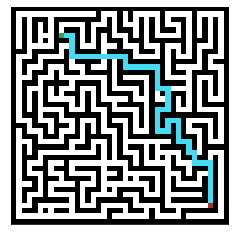

CPU times: user 57.9 ms, sys: 3.13 ms, total: 61.1 ms
Wall time: 57.6 ms


In [6]:
%%time
## Find and visualize the path
pf = Pathfinder(maze=maze, c = lambda x, y: 1, h = manhattan)
maze.draw_map(pf.get_path())

In [7]:
"""
Μέρος 2 - Απαντήσεις στις ερωτήσεις
# g(n) = 0 & h(n) = {manhattan(n), euclidean(n)} -> Best First (Θα βρίσκει πάντα λύση εφόσον η ευριστική είναι consistent και admissible)
(Οι Manhattan και η euclidean είναι consistent και admissible)
# g(n) = 1 & h(n) = 0 -> Branch and Bound (θα βρίσκει πάντα βέλτιστη λύση στο πρόβλημά μας (όχι με τον πιο γρήγορο τρόπο όμως))
# g(n) = 1 & h(n) = {manhattan(n), euclidean(n)} -> A* (Θα βρίσκει πάντα λύση αφού η ευριστική δεν θα υπερεκτιμά 
την υπολοιπόμενη απόσταση από τον κόμβο στόχο, είναι δηλαδή admissible)
	
	# Άλλες Ευριστικές:
		
		1)
		def euclidean_dist_squared(a, b):
			return (a[0] - b[0])**2 + (a[1] - b[1])**2
		2)
		def chebyshev_distance(a, b): Απόσταση από τον κόμβο στόχο εάν μπορούσαμε να κινηθούμε σε διαγώνιο γειτονικό κελί
			return (abs(a[0] - b[0]) + abs(a[1] - b[1])) - min(abs(a[0] - b[0], a[1] - b[1])
"""
		

'\nΜέρος 2 - Απαντήσεις στις ερωτήσεις\n# g(n) = 0 & h(n) = {manhattan(n), euclidean(n)} -> Best First (Θα βρίσκει πάντα λύση εφόσον η ευριστική είναι consistent και admissible)\n(Οι Manhattan και η euclidean είναι consistent και admissible)\n# g(n) = 1 & h(n) = 0 -> Branch and Bound (θα βρίσκει πάντα βέλτιστη λύση στο πρόβλημά μας (όχι με τον πιο γρήγορο τρόπο όμως))\n# g(n) = 1 & h(n) = {manhattan(n), euclidean(n)} -> A* (Θα βρίσκει πάντα λύση αφού η ευριστική δεν θα υπερεκτιμά \nτην υπολοιπόμενη απόσταση από τον κόμβο στόχο, είναι δηλαδή admissible)\n\t\n\t# Άλλες Ευριστικές:\n\t\t\n\t\t1)\n\t\tdef euclidean_dist_squared(a, b):\n\t\t\treturn (a[0] - b[0])**2 + (a[1] - b[1])**2\n\t\t2)\n\t\tdef chebyshev_distance(a, b): Απόσταση από τον κόμβο στόχο εάν μπορούσαμε να κινηθούμε σε διαγώνιο γειτονικό κελί\n\t\t\treturn (abs(a[0] - b[0]) + abs(a[1] - b[1])) - min(abs(a[0] - b[0], a[1] - b[1])\n'

## Μέρος 3 
Επειδή ο αλγόριθμός κατασκευής λαβυρίνθων μας δουλεύει για περιττά Ν, θα πάρουμε 41 τιμές, από το 11 έως και το 91 με βήμα 2.

In [8]:
# Στον υπολογιστή μας η εκτέλεση του block αυτού θέλει περίπου 25 δευτερόλεπτα
from math import sqrt
def manhattan(a, b):
	return abs(a[0] - b[0]) + abs(a[1] - b[1])
def euclidean(a, b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

'''
bfmh -> Best First - Manhattan Distance
bfeu -> Best First - Euclidean Distance
bad -> Branch and Bound
astarmh -> A* - Manhattan Distance
astareu -> A* - Euclidean Distance
en -> Expanded nodes
'''
bfmh_path_lengths = []
bfmh_en_lengths = []
bfeu_path_lengths = []
bfeu_en_lengths = []

bad_path_lengths = []
bad_en_lengths = []

astarmh_path_lengths = []
astarmh_en_lengths = []
astareu_path_lengths = []
astareu_en_lengths = []

for i in range(11, 92, 2):
    bfmh_path_sum = 0
    bfmh_en_sum = 0
    bfeu_path_sum = 0
    bfeu_en_sum = 0

    bad_path_sum = 0
    bad_en_sum = 0

    astarmh_path_sum = 0
    astarmh_en_sum = 0

    astareu_path_sum = 0
    astareu_en_sum = 0
    for j in range(1, 11):
        current_maze = Maze(i, (1, 1), (i-2, i-2))
        pf_bfmh = Pathfinder(maze = current_maze, c = lambda x, y: 0, h = manhattan)
        pf_bfeu = Pathfinder(maze = current_maze, c = lambda x, y: 0, h = euclidean)
        pf_bad = Pathfinder(maze = current_maze, c = lambda x,y: 1, h = lambda x, y: 0)
        pf_astarmh = Pathfinder(maze = current_maze, c = lambda x, y: 1, h = manhattan)
        pf_astareu = Pathfinder(maze = current_maze, c = lambda x, y: 1, h = euclidean)

        bfmh_path_sum += len(pf_bfmh.get_path())
        bfmh_en_sum += len(pf_bfmh.get_expanded_nodes())

        bfeu_path_sum += len(pf_bfeu.get_path())
        bfeu_en_sum += len(pf_bfeu.get_expanded_nodes())

        bad_path_sum += len(pf_bad.get_path())
        bad_en_sum += len(pf_bad.get_expanded_nodes())


        astarmh_path_sum += len(pf_astarmh.get_path())
        astarmh_en_sum += len(pf_astarmh.get_expanded_nodes())

        astareu_path_sum += len(pf_astareu.get_path())
        astareu_en_sum += len(pf_astareu.get_expanded_nodes())
    # Φτιάχνουμε 10 λαβυρίνθους για κάθε i και παίρνουμε τον μέσο όρο
    bfmh_path_lengths.append(bfmh_path_sum / 10)
    bfmh_en_lengths.append(bfmh_en_sum / 10)

    bfeu_path_lengths.append(bfeu_path_sum / 10)
    bfeu_en_lengths.append(bfeu_en_sum / 10)

    bad_path_lengths.append(bad_path_sum / 10)
    bad_en_lengths.append(bad_en_sum / 10)
    
    astarmh_path_lengths.append(astarmh_path_sum / 10)
    astarmh_en_lengths.append(astarmh_en_sum / 10)

    astareu_path_lengths.append(astareu_path_sum / 10)
    astareu_en_lengths.append(astareu_en_sum / 10)


Text(0.5, 1.0, 'Μήκος ελάχιστου μονοπατιού ως προς διάσταση λαβυρίνθου')

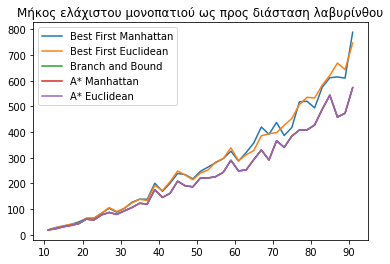

In [9]:
maze_sizes = [i for i in range (11, 92, 2)]
plt.plot(maze_sizes, bfmh_path_lengths) # Μπλε
plt.plot(maze_sizes, bfeu_path_lengths) # Πορτοκαλί
plt.plot(maze_sizes, bad_path_lengths) # Πράσινο (Δεν φαίνεται γιατί ταυτίζεται με τη μωβ)
plt.plot(maze_sizes, astarmh_path_lengths) # Κόκκινο (Δεν φαίνεται γιατί ταυτίζεται με τη μωβ)
plt.plot(maze_sizes, astareu_path_lengths) # Μωβ

plt.legend(["Best First Manhattan", "Best First Euclidean", "Branch and Bound", "A* Manhattan", "A* Euclidean"])
plt.title("Μήκος ελάχιστου μονοπατιού ως προς διάσταση λαβυρίνθου")

### Σχολιασμός μήκους ελάχιστου μονοπατιού
Όπως περιμέναμε, το μήκος του ελάχιστου μονοπατιού αυξάνεται όσο μεγαλώνει το Ν. Η αύξηση αυτή φαίενται να είναι πολυωνυμική, πιθανώς ανάλογη του N^2 όπως και ο αριθμός των κελιών.

Ο Best First (και στις δύο εκδοχές) δε βρίσκει πάντα τη βέλτιση λύση, και η διαφορά μήκους από τη βέλτιστη λύση (που βρίσκουν οι άλλοι 3 αλγόριθμοι) αυξάνεται όσο μεγαλώνει το Ν. Παρατηρούμε επισης μικρές αποκλίσεις ανάμεσα στις δύο εκδοχές (Manhattan και Euclidean). 

Ο Branch and Bound και ο Α* (και στις δύο εκδοχές) υπολογίζουν κάθε φορά την ίδια ελάχιστη απόσταση, η οποία είναι κάθε φορά η βέλτιστη λύση. 

Text(0.5, 1.0, 'Μήκος επεκτεταμένων κόμβων ως προς διάσταση λαβυρίνθου')

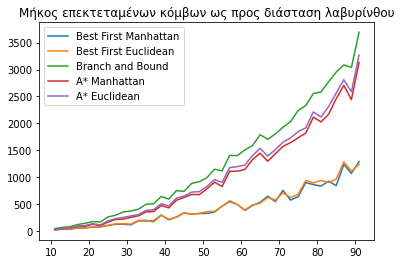

In [10]:
plt.plot(maze_sizes, bfmh_en_lengths) # Μπλε
plt.plot(maze_sizes, bfeu_en_lengths) # Πορτοκαλί
plt.plot(maze_sizes, bad_en_lengths) # Πράσινο
plt.plot(maze_sizes, astarmh_en_lengths) # Κόκκινο
plt.plot(maze_sizes, astareu_en_lengths) # Μωβ
plt.legend(["Best First Manhattan", "Best First Euclidean", "Branch and Bound", "A* Manhattan", "A* Euclidean"])
plt.title("Μήκος επεκτεταμένων κόμβων ως προς διάσταση λαβυρίνθου")

### Σχολιασμός μήκους επεκτεταμένων κόμβων
Όπως και πριν, το μήκος των επεκτεταμένων κόμβων αυξάνεται όσο μεγαλώνει το Ν. Η αύξηση φαίνεται να είναι και αυτή πολυωνυμική, πιθανώς ανάλογη του N^2 όπως και ο αριθμός των κελιών.

Ο Best First δεν βρίσκει πάντα τη βέλτιστη λύση, αλλά φτάνει σε μια καλή λύση πολύ πιο γρήγορα από τους άλλους αλγορίθμους. Η πολυπλοκότητα φαίνεται σχεδόν γραμμική.

Ο Branch and Bound επεκτείνει τους περισσότερους κόμβους οπότε καθυστερέι πιο πολύ, ενώ ο Α* με τη χρήση της ευριστικής καταλήγει στην ίδια λύση γρηγορότερα. Επίσης, παρατηρούμε ότι ο αλγόριθμος Α* με απόσταση Manhattan βρίσκει τη λύση λίγο γρηγορότερα από τον A* με Ευκλείδεια απόσταση.

### Σημείωση
Ξαναορίζουμε εδώ την κλάση pathfinder προσθέτωντας τα visualizations, γιατί παίρνουν πολύ χρόνο για μεγάλα Ν και πριν δεν τα χρειάζόμασταν.

In [11]:
class Pathfinder:
	def __init__(self, maze, c, h):
		"""
		maze : Αντικείμενο τύπου Maze (από Μέρος 1)
		c : Συνάρτηση που υπολογίζει την πραγματική απόσταση μεταξύ δύο σημείων
		h : Συνάρτηση που υπολογίζει την ευριστική μεταξύ δύο σημείων
		"""
		self.maze = maze
		self.vis = visualization(maze.S, maze.F)
		self.path = []
		self.cost = c
		self.heuristic = h
		self.expanded_nodes = [] # Το κλειστό σύνολο, χρειάζεται για το πλήθος των επεκτεταμένων κόμβων

	### Fill the path list with the coordinates of each point in the path from maze.S to maze.F
	

		"""****		ΘΕΩΡΗΤΙΚΑ	*****"""
	# g(n) = 0 & h(n) = {manhattan(n), euclidean(n)} -> Best First (Θα βρίσκει πάντα λύση εφόσον η ευριστική είναι consistent και admissible) (Οι Manhattan και η euclidean είναι consistent και admissible)
	# g(n) = 1 & h(n) = 0 -> Branch and Bound (θα βρίσκει πάντα βέλτιστη λύση στο πρόβλημά μας (όχι με τον πιο γρήγορο τρόπο όμως))
	# g(n) = 1 & h(n) = {manhattan(n), euclidean(n)} -> A* (Θα βρίσκει πάντα λύση αφού η ευριστική δεν θα υπερεκτιμά την υπολοιπόμενη απόσταση από τον κόμβο στόχο, είναι δηλαδή admissible)
	
	# Άλλες Ευριστικές:
		"""
		1)
		def euclidean_dist_squared(a, b):
			return (a[0] - b[0])**2 + (a[1] - b[1])**2
		2)
		def chebyshev_distance(a, b): #Απόσταση από τον κόμβο στόχο εάν μπορούσαμε να κινηθούμε σε διαγώνιο γειτονικό κελί
			return (abs(a[0] - b[0]) + abs(a[1] - b[1])) - min(abs(a[0] - b[0], a[1] - b[1])
		"""


		"""Δημιουργούμε ένα dictionary (με κλειδιά τις συντεταγμένες των κελιών) για να βρίσκουμε το κόστος (απόσταση από την αφετηρία) ενός κελιού."""

		g_func = {(x, y):-1 for x in range(self.maze.N) for y in range(self.maze.N)}
		g_func[self.maze.S] = 0
		
		# dictionary όπου αποθηκεύουμε τις συντεταγμένες κάθε κελιού που ανήκει στο μονοπάτι-λύση, 
		# θέτοντας ως κλειδί του τις συντεταγμένες του γειτονικού του κελιού (που βρίσκεται πλησιέστερα στο κελί-στόχο)
		solution = {} 
		"""Χρησιμοποιούμε priority queue για να δημιουργήσουμε το μέτωπο αναζήτησης (ταξινομημένη ουρά με βάση την τιμή της συνάρτησης κόστους, κατά αύξουσα σειρά)"""
		frontier = PriorityQueue() 
		frontier.put((self.heuristic(self.maze.S, self.maze.F), self.maze.S)) # (f(n), n)
		frontier_list = [self.maze.S] # Λίστα του μετώπου αναζήτησης, χρειάζεται για το visualization

		"""Μέχρι να φτάσουμε τον κόμβο στόχο, βγάζουμε ένα κέλι από την ουρά προτεραιότητας, 
		βρίσκουμε τα γειτονικά κελία-μονοπάτια του και τα προσθέτουμε στην ουρά προτεραιότητας, 
		αφότου υπολογίσουμε την τιμή της συνάρτησης κόστους τους."""

		while not frontier.empty():
			# print(frontier_list)
			current_cell = frontier.get()[1]
			frontier_list.remove(current_cell) # Δεν ξεχνάμε να αφαιρέσουμε το παρόν κελί από το μέτωπο αναζήτησης
			self.expanded_nodes.append(current_cell)
			self.vis.draw_step(self.maze, frontier_list, self.expanded_nodes) # Προσθήκη της εικόνας στο visualization
			if current_cell == self.maze.F:
				break
			x, y = current_cell
			neighbours = []
			if self.maze.grid[x - 1][y] == 1: # West
				neighbours.append((x - 1, y))
			if self.maze.grid[x + 1][y] == 1: # East
				neighbours.append((x + 1, y))
			if self.maze.grid[x][y - 1] == 1: # North
				neighbours.append((x, y - 1))
			if self.maze.grid[x][y + 1] == 1: # South
				neighbours.append((x, y + 1))
			for cell in neighbours:
				if g_func[cell] == -1:
					g_func[cell] = g_func[current_cell] + c(cell, current_cell)
					frontier.put((g_func[cell] + self.heuristic(cell, self.maze.F), cell))
					frontier_list.append(cell)
					solution[cell] = current_cell 
		"""
		Διατρέχουμε το dictionary με τα μονοπάτια και τα αποθηκεύουμε σε μορφή λίστας. 
		Με αυτόν τον τρόπο παίρνουμε το μονοπάτι από τον κόμβο F στο κόμβο S, 
		οπότε στην συνέχεια αντιστρέφουμε την λίστα για να πάρουμε το επιθυμητό αποτέλεσμα
		"""
		i = self.maze.F
		inv_path = [i]
		while i != self.maze.S:
			i = solution[i]
			inv_path.append(i)
		
		self.path = inv_path[::-1]
		self.vis.add_path(self.path)
		self.vis.create_gif()
		self.vis.show_gif()
		self.vis.save_gif("g.gif")
	def get_path(self):
		return self.path
	def get_expanded_nodes(self):
		return self.expanded_nodes

In [12]:
## Create a 23x23 maze
N = 23
S = (1, 1)
F = (21, 21)
maze = Maze(N, S, F)

In [13]:
# Visualization του αλγορίθμου Best First με Manhattan Distance
pf1 = Pathfinder(maze=maze, c = lambda x, y: 0, h = manhattan)
pf1.vis.show_gif()

In [14]:
# Visualization του αλγορίθμου Best First με Euclidean Distance
pf2 = Pathfinder(maze=maze, c = lambda x, y: 0, h = euclidean)
pf2.vis.show_gif()

In [15]:
# Visualization του αλγορίθμου Branch and Bound
pf3 = Pathfinder(maze=maze, c = lambda x, y: 1, h = lambda x,y: 0)
pf3.vis.show_gif()

In [16]:
# Visualization του αλγορίθμου A* με Manhattan Distance
pf4 = Pathfinder(maze=maze, c = lambda x, y: 1, h = manhattan)
pf4.vis.show_gif()

In [17]:
# Visualization του αλγορίθμου A* με Euclidean Distance
pf5 = Pathfinder(maze=maze, c = lambda x, y: 1, h = euclidean)
pf5.vis.show_gif()

### Σχολιασμός των visualizations
Η πολυπλοκότητα των αλγορίθμων φαίνεται από τα visualizations. Ο Best First βρίσκει μια καλή λύση γρήγορα (λίγα μπλε σκούρα κελιά), και για μικρά Ν είναι πολύ πιθανό η λύση αυτή να είναι και η βέλτιστη. Ο Branch and Bround επεκτείνει πολλούς κόμβους (πολλά μπλε σκούρα κελιά), ενώ ο Α* βρίσκει την ίδια λύση επεκτείνοντας λιγότερα μονοπάτια.

## Μέρος 4

In [18]:
def find_points(image_array, pixels):
    points = []
    for grid_i, i in enumerate(range (10, image_array.shape[0]-10, 20)):
        for grid_j, j in enumerate(range (10, image_array.shape[1]-10, 20)):
            if np.array_equal(image_array[i][j], pixels):
                points.append([grid_i+1, grid_j+1])
    return points

def load_maze(fname='/content/drawing.png'):
    N = 17
    image = PIL.Image.open(fname)
    image_array = np.round(np.array(image)/255)

    start_x, start_y = find_points(image_array, [0,1,0,1])[0]
    end_x, end_y = find_points(image_array, [1, 0, 0, 1])[0]
    walls = find_points(image_array, [0, 0, 0, 1])
    new_grid = Maze(N, (start_x, start_y), (end_x, end_y))

    for i in range(N):
        for j in range(N):
            if [i, j] in walls:
                new_grid.grid[i,j] = 0
            else:
                new_grid.grid[i, j] = 1

    g = new_grid
    g.draw_map()
    return g


### Λαβύρινθος 1
Ο αλγόριθμος Hill Climbing σταματά όταν βρει παιδί με μεγαλύτερη ευριστική. Όταν λοιπόν στον συγκεκριμένο αλγόριθμο πάμε από τον κόμβο (6, 4) στον κόμβο (6, 3), η ευριστική (είτε θεωρήσουμε Manhattan distance είτε Euclidean distance) θα αποκτά μεγαλύτερη τιμή, οπότε ο αλγόριθμος θα τελειώνει και θα ανακοινώνει αποτυχία.

![maze1](4-1.png)

### Σημείωση
Αν δεν φαίνονται οι λαβύριθνοι από το notebook, έχουμε προσθέσει τις αντίστοιχες εικόνες στο zip 

In [1]:
import PIL
g = load_maze("4-1.png")

NameError: name 'load_maze' is not defined


### Λαβύρινθος 2
Ζητείται ο Α* να καθυστερεί μέγιστα για κάθε πιθανή ευριστική συνάρτηση. Αυτό σημαίνει ότι αν σε κάποιο σημείο έχουμε διακλάδωση, τότε θα υπάρχει πάντα μια ευριστική που βρίσκει πιο γρήγορα το συντομότερο μονοπάτι. Σε έναν λαβύριθνο με μόνο ένα μονοπάτι ο Α* θα επεκτείνει κάθε φορά συγκεκριμένο κόμβο ανεξάρτητα της ευριστικής, και θα πρέπει να επεκτείνει όλους τους κόμβους για να φτάσει στο τέλος, άρα θα χρειάζεται και τον μέγιστο χρόνο.

![maze2](4-2.png)

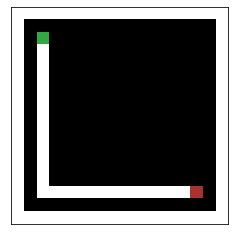

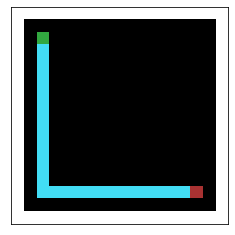

In [20]:
g = load_maze("4-2.png")
pf_astarmh = Pathfinder(g, lambda x, y: 1, manhattan)
g.draw_map(pf_astarmh.get_path())
pf_astarmh.vis.show_gif()


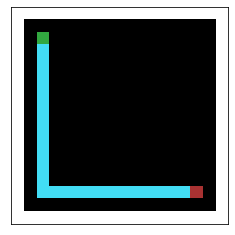

In [21]:
pf_astareu = Pathfinder(g, lambda x, y: 1, euclidean)
g.draw_map(pf_astareu.get_path())
pf_astareu.vis.show_gif()

### Για την ερώτηση του Λαβυρίνθου 2:
Σε λαβυρίνθους που μπορούμε να κινηθούμε μόνο σε δύο κατευθύνσεις (πάνω-κάτω, δεξιά-αριστερά) η Ευκλείδεια απόσταση γυρνάει πάντα μικρότερες αποστάσεις από την απόσταση Manhattan. Σε τέτοια mazes η απόσταση Manhattan λειτουργεί καλύτερα, αφού δεν μπορούμε να κινηθούμε διαγώνια σε ένα μονοπάτι.

### Λαβύρινθος 3
Ο Greedy Best First θα αργήσει σημαντικά αν στην αρχή τα πιθανά μονοπάτια έχουν μεγάλες τιμές ευριστικής (απομακρύνονται από τον στόχο). Τότε ο Greedy Best First θα επιλέξει όλα τα άλλα μονοπάτια που καταλήγουν σε αδιέξοδο, ενώ τα μονοπάτια που οδηγούν στον στόχο θα επιλεγούν προς το τέλος.

![maze3](4-3.png)

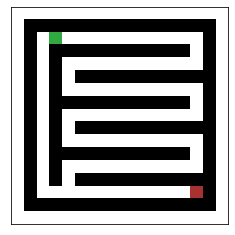

In [22]:
g = load_maze("4-3.png")
pf_bf = Pathfinder(g, lambda x, y: 0, manhattan) # Ο Best First
pf_bf.vis.show_gif()

In [23]:
pf_astar = Pathfinder(g, lambda x, y: 1, manhattan) # O A*
pf_astar.vis.show_gif()

### Για την ερώτηση του Λαβυρίνθου 3
Ο Best First και ο A* συμπεριφέρονται με τον ίδιο τρόπο όταν το μονοπάτι με τις πιο μικρές ευριστικές είναι και το συντομότερο. Διαισθητικά αυτό προκύπτει όταν το συντομότερο μονοπάτι πηγαίνει κατευθείαν στον στόχο και δεν απομακρύνεται από αυτόν.


### Λαβύρινθος 4
Ο Dijstra (Branch and Bound) καθυστερεί όταν στον λαβύρινθο υπάρχουν πολλές διακλαδώσεις (όσο το δυνατόν λιγότερα εμπόδια). Τα μικρά εμπόδια που δημιουργούν
πολλά διαφορετικά μονοπάτια καθυστερούν πολύ τον Dijstra, ενώ ο Α* μέσω της ευριστικής βρίσκει πιο γρήγορα τη λύση.

![maze4](4-4.png)

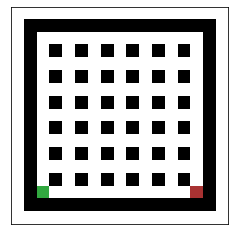

In [24]:
g = load_maze("4-4.png")
pf_dijkstra = Pathfinder(g, lambda x, y: 1, lambda x, y: 0) # O Dijkstra
pf_dijkstra.vis.show_gif()

In [25]:
pf_astar = Pathfinder(g, lambda x,y: 1, manhattan) # O A*
pf_astar.vis.show_gif()

### Για την ερώτηση του Λαβυρίνθου 4
Αν έχουμε μικρά εμπόδια που δεν ενώνονται μεταξύ τους οπότε δημιουργούνται και πολλές διακλαδώσεις, ο Dijkstra αυξάνεται πρακτικά εκθετικά ενώ ο A* με τη χρήση της ευριστικής μπορεί να αγνοεί τα σίγουρα αργά μονοπάτια και να βρίσκει γρηγορότερα τη λύση. 

### Λαβύρινθος 5
Ακριβώς αντίθετα με τον λαβύρινθο 4, εδώ δεν έχουμε καμία διακλάδωση, οπότε ο Dijkstra πραγματοποιεί τον ίδιο αριθμό βημάτων με τον Α*.

![maze5](4-5.png)

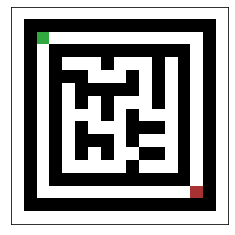

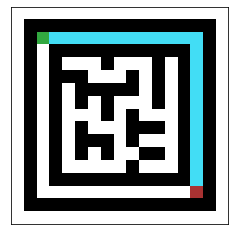

In [26]:
g = load_maze("4-5.png")
pf_dijkstra = Pathfinder(g, lambda x, y: 1, lambda x, y: 0) # O Dijkstra
g.draw_map(pf_dijkstra.get_path())
pf_dijkstra.vis.show_gif()

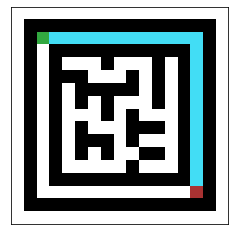

In [27]:
pf_astar = Pathfinder(g, lambda x,y: 1, euclidean) # O A*
g.draw_map(pf_astar.get_path())
pf_astar.vis.show_gif()